In [21]:
import numpy as np
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , Dense, Flatten , Embedding,Reshape,LeakyReLU,Dropout
from keras.datasets import cifar10
from keras.utils import normalize , to_categorical
from keras.models import Sequential
from keras.layers import concatenate
from keras.optimizers import Adam

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

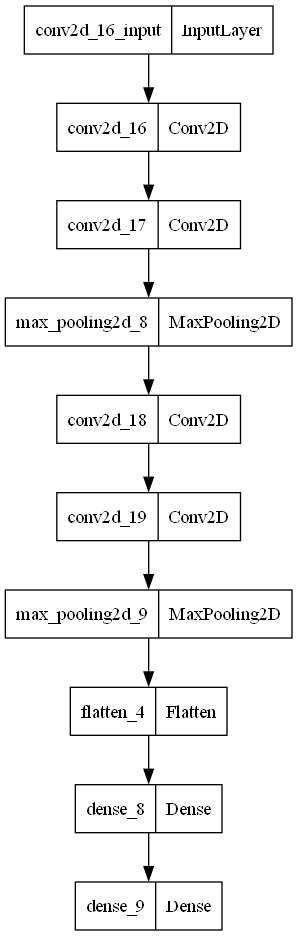

In [11]:
model = Sequential()

model.add(Conv2D(32,3 , activation='relu' , input_shape=(32,32,3)))
model.add(Conv2D(32,3 , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,3 , activation='relu'))
model.add(Conv2D(64,3 , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dense(10 , activation='softmax'))

model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])
print(model.summary())

plot_model(model , to_file='model.png')

In [ ]:
from keras.layers import Input
from keras.models import Model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 64)        36928     
                                                           

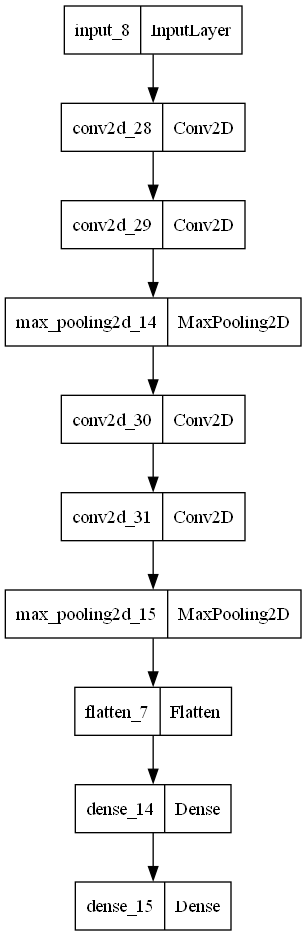

In [14]:
input_img = Input(shape=(32,32,3))
conv1_1 = Conv2D(32 , kernel_size=3 , activation='relu')(input_img)
conv1_2 = Conv2D(32 , kernel_size=3 , activation='relu')(conv1_1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1_2)

conv2_1 = Conv2D(64 , kernel_size=3 , activation='relu')(pool1)
conv2_2 = Conv2D(64 , kernel_size=3 , activation='relu')(conv2_1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2_2)

flat = Flatten()(pool2)

hidden1 = Dense(128 , activation='relu')(flat)
output = Dense(10 , activation='softmax')(hidden1)

model_func = Model(inputs = input_img , outputs = output)
model_func.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])
print(model_func.summary())

plot_model(model_func)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 61, 61, 32)           544       ['input_13[0][0]']            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 29, 29, 32)           1568      ['input_14[0][0]']            
                                                                                            

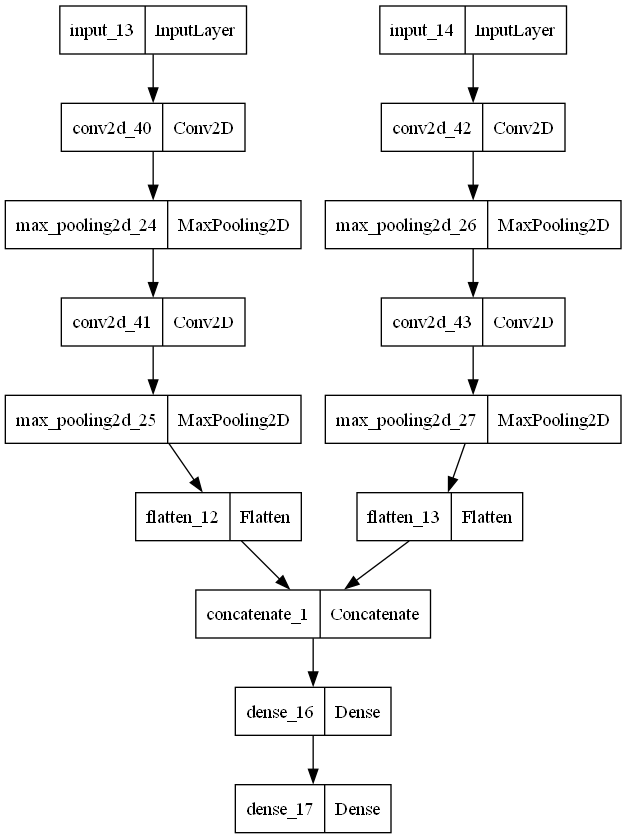

In [20]:
input1 = Input(shape=(64,64,1))
conv11 = Conv2D(32,kernel_size = 4 , activation='relu')(input1)
pool11 = MaxPooling2D(pool_size=(2,2))(conv11)
conv12 = Conv2D(16,kernel_size = 4 , activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2,2))(conv12)
flat1 = Flatten()(pool12)

input2 = Input(shape=(32,32,3))
conv21 = Conv2D(32,kernel_size = 4 , activation='relu')(input2)
pool21 = MaxPooling2D(pool_size=(2,2))(conv21)
conv22 = Conv2D(16,kernel_size = 4 , activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2,2))(conv22)
flat2 = Flatten()(pool22)

merge = concatenate([flat1 , flat2])

hidden = Dense(10,activation='relu')(merge)
output = Dense(1 , activation='sigmoid')(hidden)

model = Model(inputs=[input1,input2] , outputs=output)
print(model.summary())
plot_model(model)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 1, 50)                500       ['input_29[0][0]']            
                                                                                                  
 dense_31 (Dense)            (None, 1, 1024)              52224     ['embedding_9[0][0]']         
                                                                                                  
 input_30 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                            

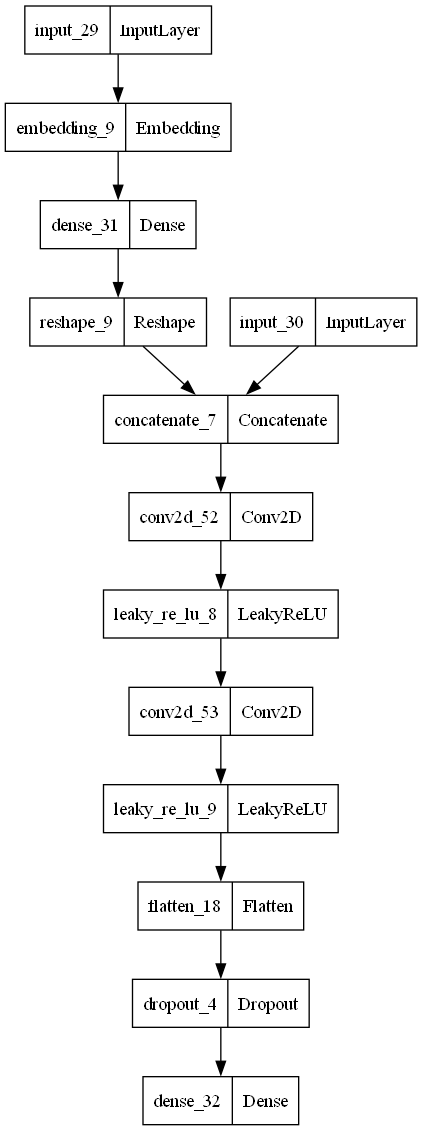

In [32]:
in_shape = (32,32,3)
n_classes = 10

in_label = Input(shape=(1,))
li = Embedding(n_classes, 50)(in_label)
n_nodes = in_shape[0]*in_shape[1]
li = Dense(n_nodes)(li)
li = Reshape((in_shape[0] , in_shape[1] , 1))(li)

in_image = Input(shape = in_shape)
merge = concatenate([in_image,li])

fe = Conv2D(128 , (3,3) , strides=(2,2) , padding='same')(merge)
fe = LeakyReLU(alpha=0.2)(fe)
fe = Conv2D(128 , (3,3) , strides=(2,2) , padding='same')(fe)
fe = LeakyReLU(alpha=0.2)(fe)

fe = Flatten()(fe)
fe = Dropout(0.4)(fe)
out_layer = Dense(1 , activation='sigmoid')(fe)

model_disc = Model(inputs=[in_image,in_label] , outputs=out_layer)
opt = Adam(0.0002 , beta_1 = 0.5)
model_disc.compile(loss='binary_crossentropy' , optimizer=opt , metrics=['accuracy'])

print(model_disc.summary())
plot_model(model_disc)